<a href="https://colab.research.google.com/github/Arjun-R-krishnan/Predicting-Diabetes-Progression-using-Artificial-Neural-Networks/blob/main/Diabetes_prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

## Loading dataset

In [2]:
# when loading deafult the data is scaled to avoid scaled data setting it as false
diabetes = load_diabetes(scaled = False)

In [3]:
print(diabetes)

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,

In [4]:
## Converting the diabetes data into a dataframe
df = pd.DataFrame(diabetes.data,columns =diabetes.feature_names)

In [5]:
# adding the target column as diabetes
df['diabetes'] = diabetes.target

In [6]:
# Display the first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [7]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  diabetes  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [8]:
# Summary statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Checking for any missing values

In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


## Checking for duplicate values

In [11]:
duplicates = df.duplicated()

duplicate_count = duplicates.sum()

duplicate_count

0

## Normalizing the features to ensure better performance of the ANN model

In [12]:
# normalizing values using standard scaler
# Initialize the scaler
scaler = StandardScaler()

# Scale the features and convert back to DataFrame
scaled_features  = scaler.fit_transform(df.drop('diabetes', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.drop('diabetes', axis=1).columns)

In [13]:
# add the 'diabetes' column back to the DataFrame
scaled_df['diabetes'] = df['diabetes'].values

In [14]:
scaled_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


## Exploratory Data Analysis

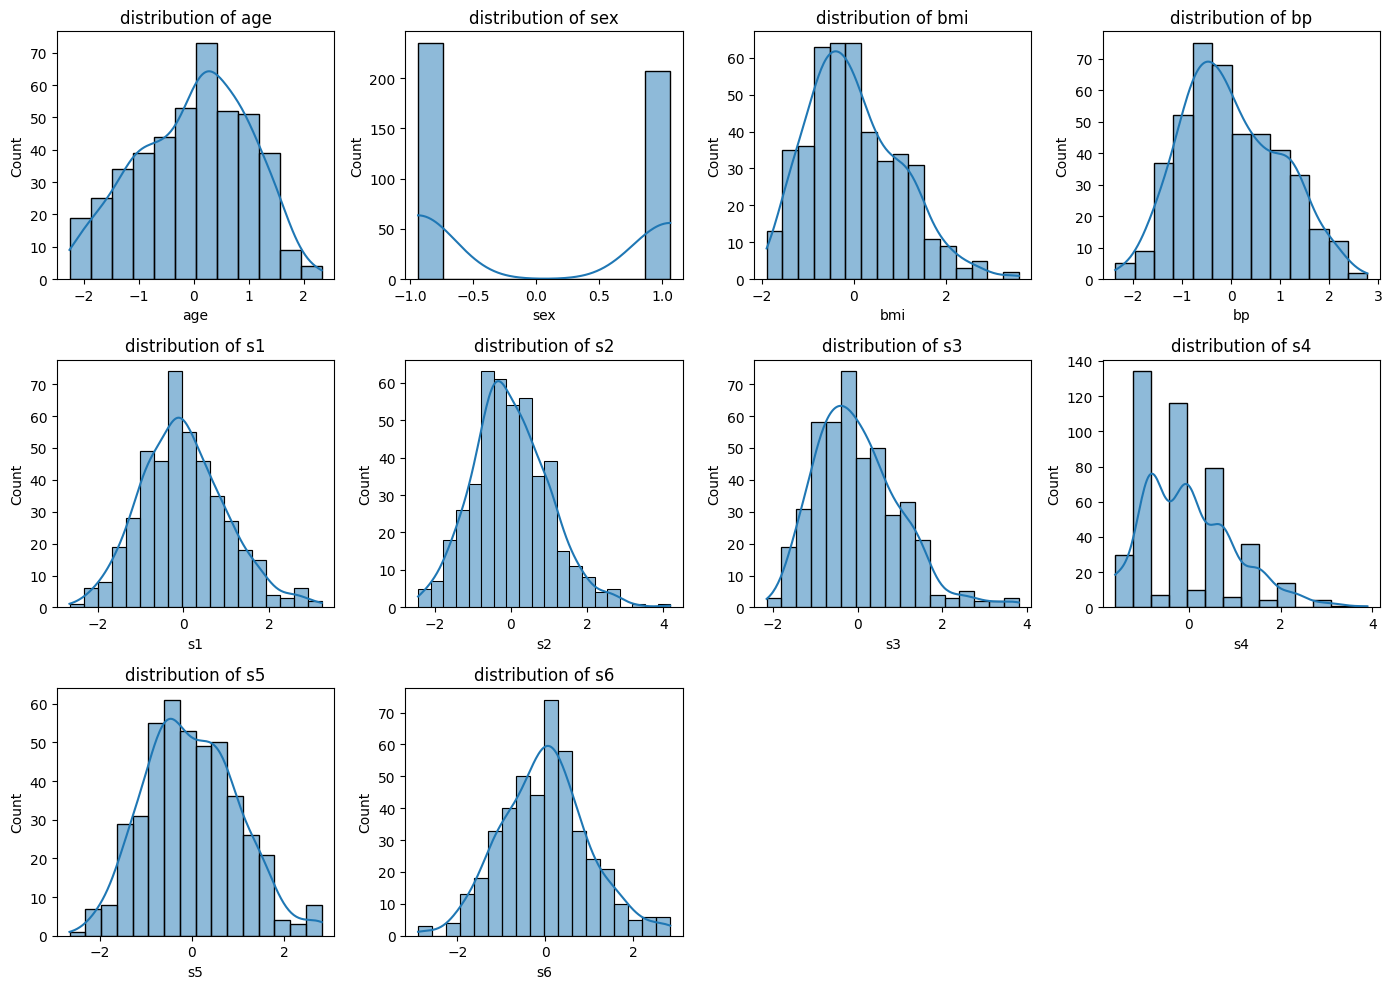

In [18]:
#plotting histplot using for loop to f

plt.figure(figsize=(14, 10))
# Loop through each feature column except the target variable
for i, col in enumerate(scaled_df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=scaled_df,x=scaled_df[col], multiple='stack', kde=True)
    plt.title(f"distribution of {col}")

plt.tight_layout()
plt.show()

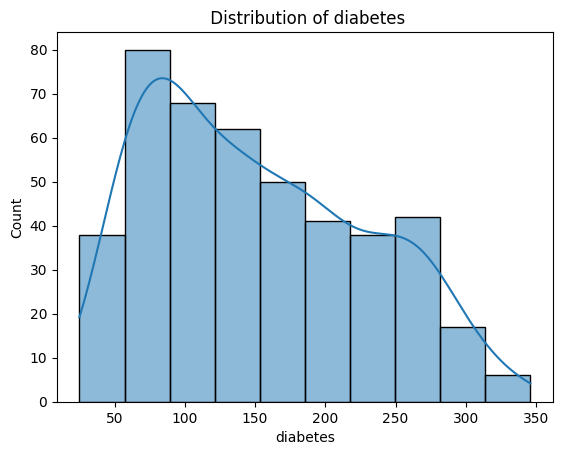

In [17]:
# disribution of diabetes column

sns.histplot(data=scaled_df, x='diabetes', kde=True)

# Show the plot
plt.title(' Distribution of diabetes')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

## Visualize the relationships between features and the target variable.

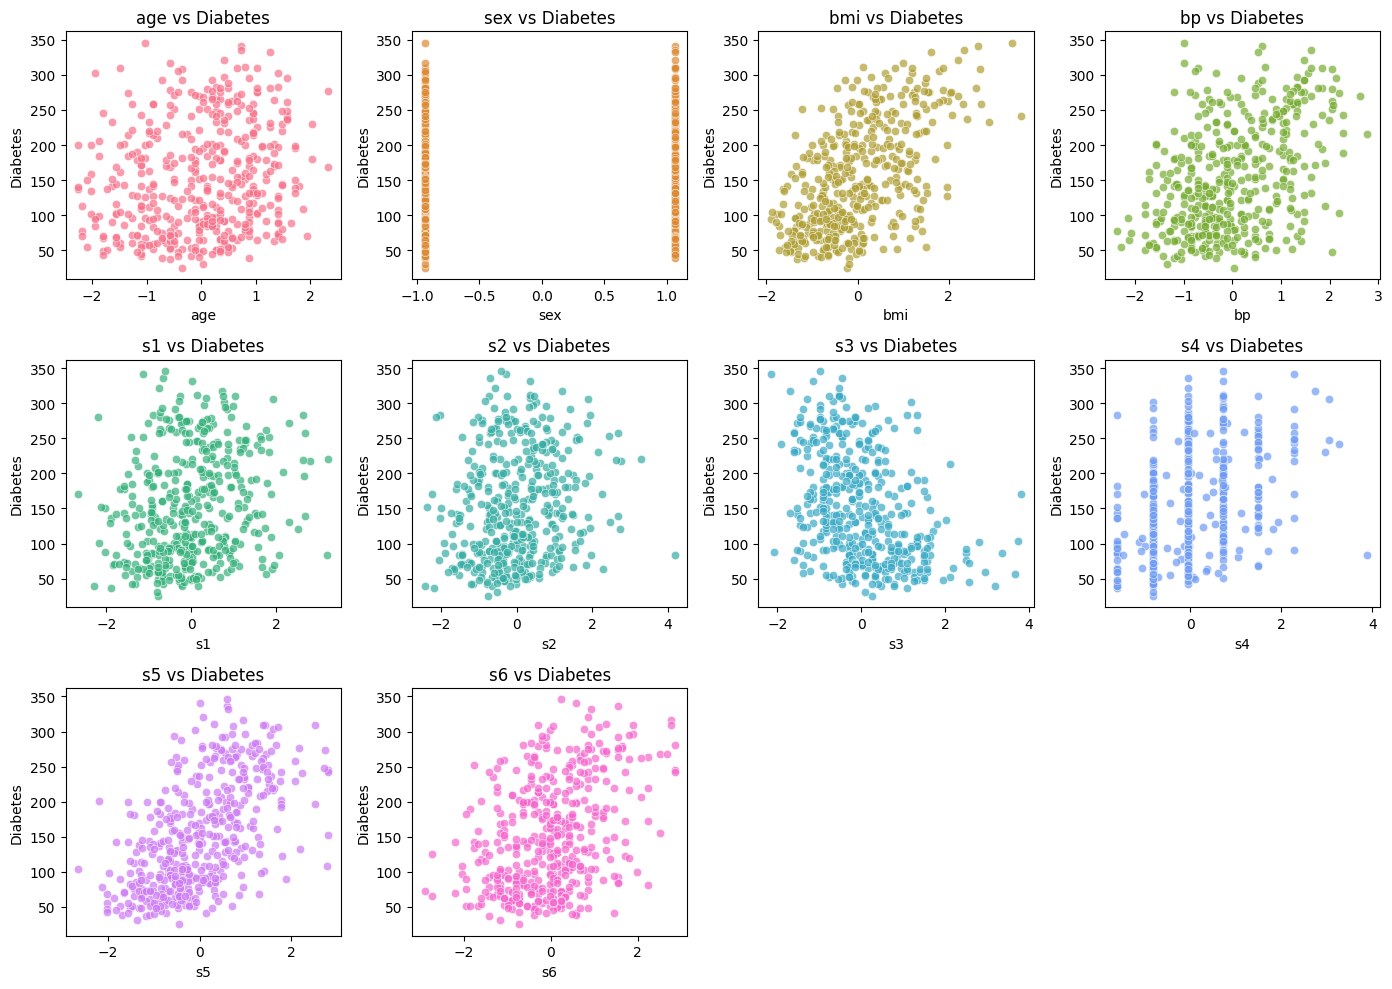

In [19]:

plt.figure(figsize=(14, 10))

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(scaled_df.columns) - 1)

# Loop through each feature column except the target variable
for i, col in enumerate(scaled_df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(data=scaled_df, x=col, y='diabetes', color=colors[i], alpha=0.7)
    plt.title(f"{col} vs Diabetes")
    plt.xlabel(col)
    plt.ylabel('Diabetes')

plt.tight_layout()
plt.show()



## Correlation matrix

In [20]:
corr_matrix = scaled_df.corr()

In [21]:
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


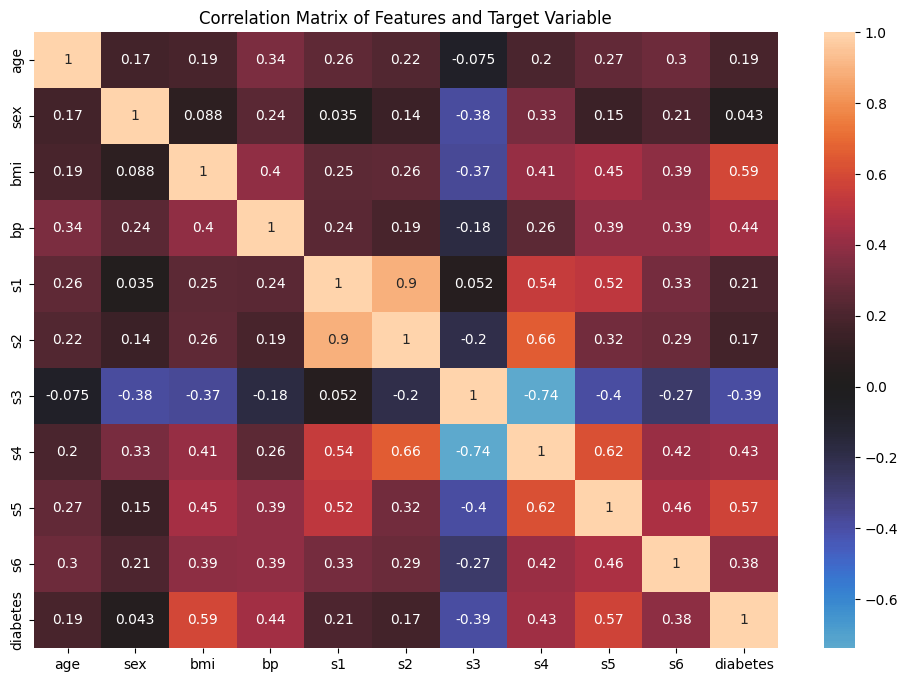

In [22]:
# Heatmap for visualizing the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title("Correlation Matrix of Features and Target Variable")
plt.show()

# Insights from the Diabetes Dataset Correlation Matrix

Based on the provided correlation matrix for the diabetes dataset, here are three key insights:

## 1. Strong Positive Correlation with BMI
- The variable **BMI (Body Mass Index)** has a significant positive correlation with the target variable **diabetes** (0.586). This suggests that as BMI increases, the likelihood of having diabetes also increases, indicating that higher body weight relative to height may be a risk factor for developing diabetes.

## 2. Correlation Between Blood Pressure and Diabetes
- The variable **blood pressure (bp)** shows a notable positive correlation with diabetes (0.441). This indicates that individuals with higher blood pressure readings may have a higher chance of being diagnosed with diabetes, highlighting the importance of monitoring both conditions.

## 3. Significant Relationships Among Symptoms (s1 to s6)
- The symptom variables (s1, s2, s3, s4, s5, and s6) show various correlations with diabetes:
  - **s5** has a positive correlation of 0.566 with diabetes, indicating that it may have a significant influence on the likelihood of diabetes.
  - Conversely, **s3** has a negative correlation (-0.394) with diabetes, suggesting that this symptom may be inversely related to diabetes diagnosis. Understanding these relationships can aid in further clinical analysis and intervention strategies.



## Building ANN Model

In [23]:
#adding all the features to x variable
x=scaled_df.drop(columns=['diabetes'])

# adding the target diabetes data to y
y=scaled_df['diabetes']

In [24]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [25]:
y.head()

,diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


## Spliting the dataset into training and testing sets

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

In [27]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(50,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

## Trainig the Model

In [29]:
history=model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29412.3125 - mean_absolute_error: 152.1788
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31257.9336 - mean_absolute_error: 159.0955 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29160.4980 - mean_absolute_error: 150.2583 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27092.5547 - mean_absolute_error: 145.9339 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26136.8008 - mean_absolute_error: 142.2740 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25350.1875 - mean_absolute_error: 140.2424 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23366.2461 - mean_absolute_error: 133.7697 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20616.9512 - mean_absolute_error: 125.4376 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19069.3398 - mean_absolute_error: 119.1879 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15457.0938 - m

## Evaluating the Model

In [30]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
loss_mae = model.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'R2  : {r2}')
print(f'loss: {loss_mae[0]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3002.1719 - mean_absolute_error: 44.0672  
MAE : 42.48449372709467
MSE : 2801.391327025821
R2  : 0.4712512098563115
loss: 2801.3916015625


In [31]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

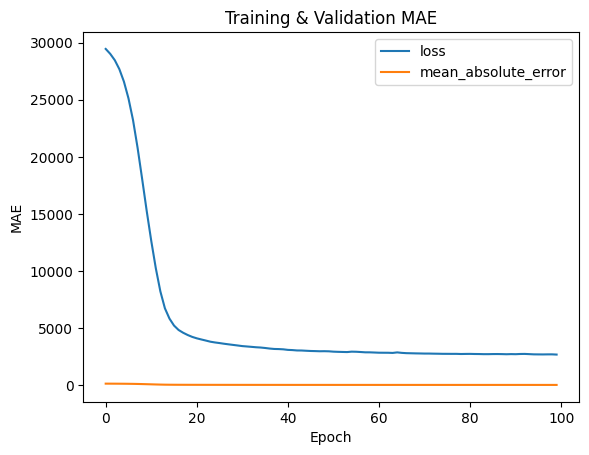

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,605 (72.68 KB)

 Trainable params: 6,201 (24.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,404 (48.46 KB)

## Improving the Model

In [34]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [36]:
history=model.fit(x_train, y_train, epochs=150, batch_size=40, verbose=1)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31013.6797 - mean_absolute_error: 157.1670
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31402.2246 - mean_absolute_error: 157.8564 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29816.6250 - mean_absolute_error: 154.4281 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28250.0703 - mean_absolute_error: 148.5338 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24484.2324 - mean_absolute_error: 138.7301 
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23364.8750 - mean_absolute_error: 133.9419 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22605.5273 - mean_absolute_error: 131.8170 
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15900.0684 - mean_absolute_error: 106.5362 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9867.5361 - mean_absolute_error: 78.4365  
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7286.2642 - mean_absolute_error: 64

In [37]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
loss_mae = model.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'R2  : {r2}')
print(f'loss: {loss_mae[0]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2824.1553 - mean_absolute_error: 42.1068  
MAE : 41.365701696845925
MSE : 2733.8715875520306
R2  : 0.48399522752109325
loss: 2733.87158203125


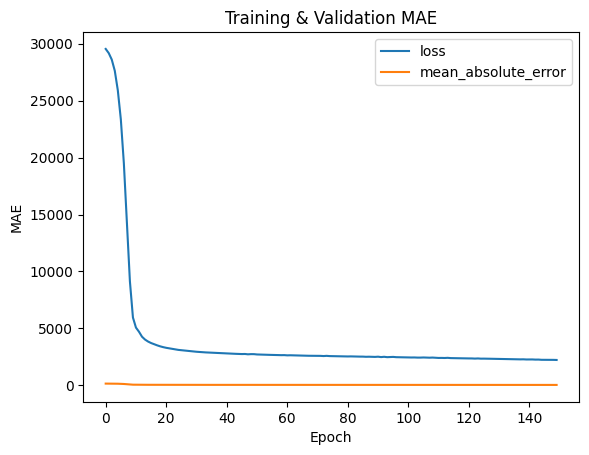

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,029 (129.02 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,020 (86.02 KB)

## Improvements in Model




## Insights from the Comparison

1. **Mean Absolute Error (MAE)**:
   - **Interpretation**: Model 2 has a lower MAE, indicating that it makes predictions that are closer, on average, to the actual values compared to Model 1. This suggests better performance in terms of absolute error.

2. **Mean Squared Error (MSE)**:
   - **Interpretation**: Similarly, Model 2 has a lower MSE, which means its predictions have smaller squared deviations from the actual values. This metric reinforces the findings from MAE, suggesting Model 2 performs better overall.

3. **R² (Coefficient of Determination)**:
   - **Interpretation**: The R² value for Model 2 is higher, indicating that it explains approximately 48% of the variance in the dependent variable compared to Model 1, which explains 47%. A higher R² suggests that Model 2 is better at capturing the underlying relationship in the data.

4. **Loss**:
   - **Interpretation**: The loss values reflect the performance during training. Model 2's lower loss indicates better optimization during training, aligning with its superior predictive performance in MAE and MSE.

## Conclusion
Overall, **Model 2** outperforms **Model 1** across all metrics (MAE, MSE, R², and Loss), indicating it is a better model for predicting the target variable in this context.
